In [1]:
from sklearn.neural_network import MLPClassifier
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/Sleep data"
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X_time = X.copy()
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])



All patients shuffled
           time         x         y         z  heartbeat  label
6803    8100.0 -0.418426  0.022034 -0.910873       75.0      2
3570   21300.0  0.246857  0.765411  0.615128       61.0      5
20807  15390.0  0.153274  0.286285 -0.921936       68.0      1
2209    6480.0 -0.512207 -0.523743  0.673050       65.0      2
9436    3720.0 -0.054596 -0.359222 -0.923004       90.0      3
Patients data size (25781, 6)

Patients data normalized heartbeat
           time         x         y         z  heartbeat  label
6803    8100.0 -0.418426  0.022034 -0.910873   0.382022      2
3570   21300.0  0.246857  0.765411  0.615128   0.224719      5
20807  15390.0  0.153274  0.286285 -0.921936   0.303371      1
2209    6480.0 -0.512207 -0.523743  0.673050   0.269663      2
9436    3720.0 -0.054596 -0.359222 -0.923004   0.550562      3
X data 
 [[-0.4184265   0.0220337  -0.9108734   0.38202247]
 [ 0.2468567   0.7654114   0.6151276   0.2247191 ]
 [ 0.1532745   0.2862854  -0.921936    0.30

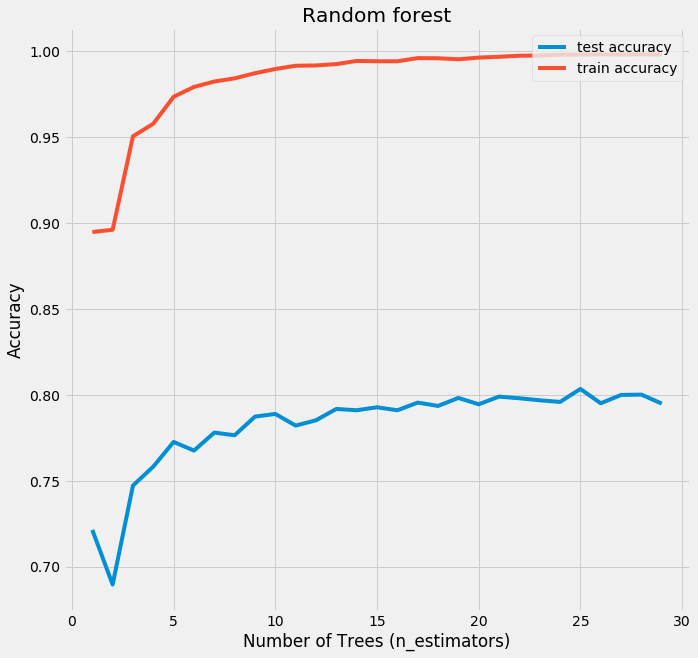

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
accuracy_data = []
accuracy_data_train = []
nums = []
for i in range(1, 30):
    Random_Forest_model = RandomForestClassifier(n_estimators = i, criterion = "entropy")
    Random_Forest_model.fit(X_train,y_train)
    y_pred = Random_Forest_model.predict(X_test)
    y_pred_train = Random_Forest_model.predict(X_train)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_data.append(accuracy)
    accuracy_data_train.append(accuracy_train)
    nums.append(i)

fig = plt.figure(figsize=(10,10))      
plt.plot(nums,accuracy_data, label = "test accuracy")
plt.plot(nums,accuracy_data_train, label = "train accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title('Random forest')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()





In [0]:
from matplotlib.pyplot import savefig
fig.savefig('/content/drive/My Drive/RandomForestWithoutTimefinal.png', transparent=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_time,y, test_size = 0.2, random_state = 42)
accuracy_data_test_time = []
accuracy_data_train_time = []
nums = []
for i in range(1, 30):
    Random_Forest_model = RandomForestClassifier(n_estimators = i, criterion = "entropy")
    Random_Forest_model.fit(X_train,y_train)
    y_pred = Random_Forest_model.predict(X_test)
    y_pred_train = Random_Forest_model.predict(X_train)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_data_test_time.append(accuracy)
    accuracy_data_train_time.append(accuracy_train)
    nums.append(i)



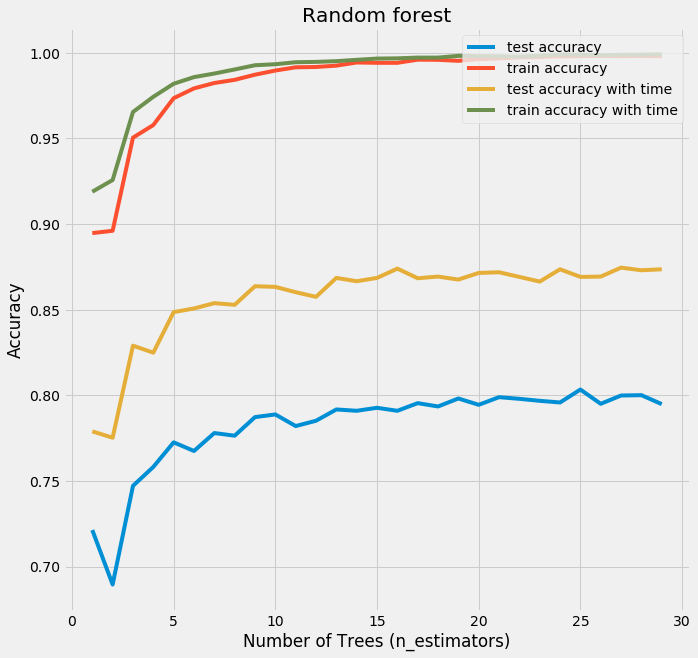

In [6]:
fig = plt.figure(figsize=(10,10))      
plt.plot(nums,accuracy_data, label = "test accuracy")
plt.plot(nums,accuracy_data_train, label = "train accuracy")
plt.plot(nums,accuracy_data_test_time, label = "test accuracy with time")
plt.plot(nums,accuracy_data_train_time, label = "train accuracy with time")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title('Random forest')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [0]:
from matplotlib.pyplot import savefig
fig.savefig('/content/drive/My Drive/RandomForestFinal.png', transparent=True)